In [42]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [43]:
def evaluate_model(y_pred_train, y_pred_test, y_train, y_test):
    mae_train = mean_absolute_error(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)
    print("MAE train: ", mae_train)
    print("MAE test: ", mae_test)
    print("R2 train: ", r2_train)
    print("R2 test: ", r2_test)
    print("MSE train: ", mse_train)
    print("MSE test: ", mse_test)

In [44]:
df = pd.read_csv('../../data/pre_train/gspc.csv', index_col='date')
df.index = pd.to_datetime(df.index)
df = df.interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')

C:\Users\santi\AppData\Local\Temp\ipykernel_8816\2841548648.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')


In [45]:
X = df.drop(columns=['close', 'log_close'])
y = df['log_close']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

In [47]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [48]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [49]:
y_train_pred = lr.predict(X_train_scaled)
y_test_pred = lr.predict(X_test_scaled)

In [50]:
evaluate_model(y_train_pred, y_test_pred, y_train, y_test)

MAE train:  0.008902362548781267
MAE test:  0.04688538953165319
R2 train:  0.9929414933510123
R2 test:  0.6887822223080444
MSE train:  0.0001437244581314486
MSE test:  0.0036771779095417442


In [51]:
poly_model = make_pipeline(PolynomialFeatures(2), LinearRegression())
poly_model.fit(X_train_scaled, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [52]:
y_train_pred_poly = poly_model.predict(X_train_scaled)
y_test_pred_poly = poly_model.predict(X_test_scaled)

In [53]:
evaluate_model(y_train_pred_poly, y_test_pred_poly, y_train, y_test)

MAE train:  0.0036774191163760723
MAE test:  0.023028222137480892
R2 train:  0.9986593211430265
R2 test:  0.9195145087169473
MSE train:  2.7298740630137262e-05
MSE test:  0.000950972250941261


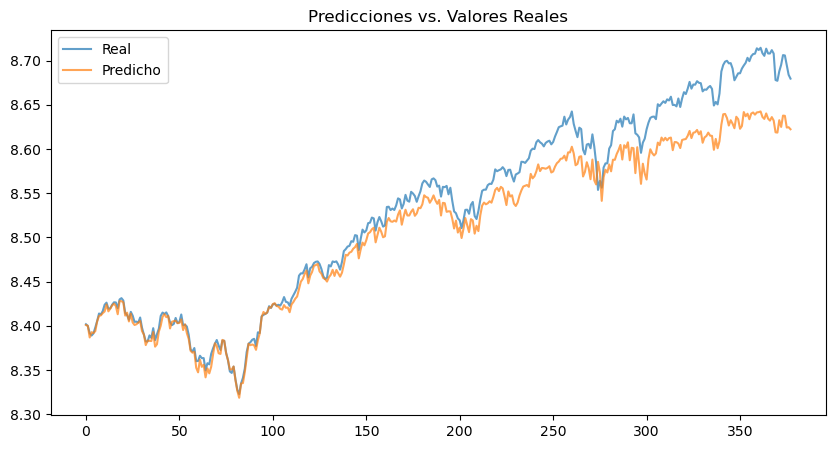

In [54]:
plt.figure(figsize=(10,5))
plt.plot(y_test.values, label="Real", alpha=0.7)
plt.plot(y_test_pred_poly, label="Predicho", alpha=0.7)
plt.legend()
plt.title("Predicciones vs. Valores Reales")
plt.show()

In [35]:
pipeline= make_pipeline(PolynomialFeatures(), LinearRegression())

In [36]:
param_grid = {
    'polynomialfeatures__degree': [1, 2, 3, 4, 5],
    'linearregression__fit_intercept': [True, False],
}

In [38]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring="r2", n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('linearregression',
                                        LinearRegression())]),
             n_jobs=-1,
             param_grid={'linearregression__fit_intercept': [True, False],
                         'polynomialfeatures__degree': [1, 2, 3, 4, 5]},
             scoring='r2')

In [39]:
best_model = grid_search.best_estimator_

In [40]:
print("Best model: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best model:  {'linearregression__fit_intercept': False, 'polynomialfeatures__degree': 2}
Best score:  0.9778115962683052


In [55]:
y_train_pred = best_model.predict(X_train_scaled)
y_test_pred = best_model.predict(X_test_scaled)
evaluate_model(y_train_pred, y_test_pred, y_train, y_test)

MAE train:  0.0036774191163747856
MAE test:  0.023028222137538478
R2 train:  0.9986593211430265
R2 test:  0.919514508716575
MSE train:  2.7298740630137384e-05
MSE test:  0.0009509722509456599
